<a href="https://colab.research.google.com/github/Dikabagas/Analyze-the-behavior-of-loan-property-customers/blob/main/Rakamin_%E2%80%93_Kickstart_Data_Science_Journey_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Andhika Dwija Bagaskara

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

# Load Dataset

In [ ]:
df_dataset = pd.read_csv('loan_customer.csv')

In [ ]:
df_dataset.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [ ]:
df_dataset.sample(5)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
605,LP002948,1983-10-14,6.281160e+11,Male,Yes,2,Graduate,No,5780.0,0.0,192000,360,30,1.0,NaN,house,APPROVE
539,LP002731,1983-02-14,6.281383e+11,Female,No,0,Not Graduate,Yes,18165.0,0.0,125000,360,30,1.0,NaN,house,APPROVE
544,LP002740,1995-06-17,NaN,Male,Yes,3+,Graduate,No,6417.0,0.0,157000,180,15,1.0,NaN,studio,APPROVE
336,LP002101,1985-09-29,6.281127e+11,Male,Yes,0,Graduate,NaN,63337.0,0.0,490000,180,15,1.0,no,house,APPROVE
431,LP002367,1987-11-04,6.287726e+11,Female,No,1,Not Graduate,No,4606.0,0.0,81000,360,30,1.0,NaN,studio,REJECT


In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [ ]:
cats = ['loan_id', 'birth_date', 'gender', 'married', 'dependents','education','self_employed','has_credit_card','property_type','loan_status']
nums = ['phone_number', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']

In [ ]:
df_dataset[nums].describe()

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,5.690000e+02,612.000000,621.000000,621.000000,621.000000,621.000000,570.000000
mean,5.468552e+11,5681.549020,1616.874267,145133.655395,342.608696,28.550725,0.842105
std,1.987860e+11,9056.454103,2915.075138,84011.115879,64.090837,5.340903,0.364963
min,6.281101e+10,150.000000,0.000000,9000.000000,12.000000,1.000000,0.000000
25%,6.281140e+11,2874.500000,0.000000,100000.000000,360.000000,30.000000,1.000000
50%,6.281343e+11,3812.500000,1167.000000,125000.000000,360.000000,30.000000,1.000000
75%,6.285665e+11,5815.750000,2302.000000,165000.000000,360.000000,30.000000,1.000000
max,6.287799e+11,170578.000000,41667.000000,700000.000000,480.000000,40.000000,1.000000


In [ ]:
df_dataset[cats].describe()

,loan_id,birth_date,gender,married,dependents,education,self_employed,has_credit_card,property_type,loan_status
count,621,572,608,618,605,620,588,88,620,621
unique,616,541,2,2,4,2,2,2,3,2
top,LP002277,1987-10-18,Male,Yes,0,Graduate,No,no,apartment,APPROVE
freq,2,2,495,403,349,485,506,52,235,426


# Data Cleansing

## Handling missing values

In [ ]:
df_dataset.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [ ]:
df_dataset.fillna(df_dataset.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,NaN,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,NaN,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,NaN,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,NaN,house,APPROVE


In [ ]:
df_dataset.fillna(df_dataset.mode().iloc[0])

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,no,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,no,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,no,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,no,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,no,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,no,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,no,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,no,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,no,house,APPROVE


## Handling duplicated data

In [ ]:
df_dataset.duplicated().sum()

1

In [ ]:
df_dataset.drop_duplicates()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,NaN,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,NaN,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,NaN,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,NaN,house,APPROVE


## Handling Outlier

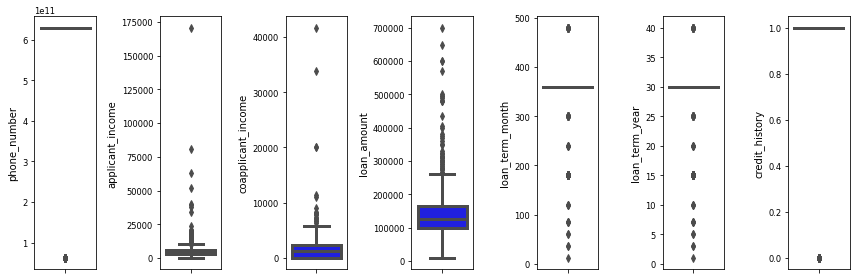

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_dataset[nums[i]], color='blue', orient='v')
    plt.tight_layout()

In [ ]:
Q1 = df_dataset['applicant_income'].quantile(0.25)
Q3 = df_dataset['applicant_income'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_dataset['applicant_income'] >= low_limit) & (df_dataset['applicant_income'] <= high_limit))
df_dataset = df_dataset[filtered_entries]

In [ ]:
Q1 = df_dataset['coapplicant_income'].quantile(0.25)
Q3 = df_dataset['coapplicant_income'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_dataset['coapplicant_income'] >= low_limit) & (df_dataset['coapplicant_income'] <= high_limit))
df_dataset = df_dataset[filtered_entries]

In [ ]:
Q1 = df_dataset['loan_amount'].quantile(0.25)
Q3 = df_dataset['loan_amount'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_dataset['loan_amount'] >= low_limit) & (df_dataset['loan_amount'] <= high_limit))
df_dataset = df_dataset[filtered_entries]

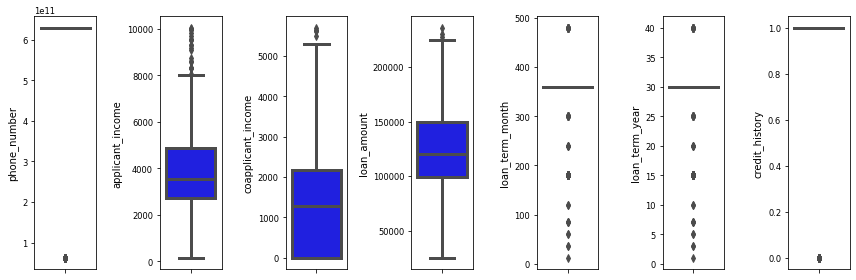

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_dataset[nums[i]], color='blue', orient='v')
    plt.tight_layout()

## Feature Encoding

In [ ]:
mapping_gender = {
    'Male':0,
    'Female':1
}
df_dataset['gender'] = df_dataset['gender'].map(mapping_gender)

mapping_married = {
    'No': 0,
    'Yes': 1
}
df_dataset['married'] = df_dataset['married'].map(mapping_married)

mapping_education = {
    'Not Graduate' : 0,
    'Graduate' : 1
}
df_dataset['education'] = df_dataset['education'].map(mapping_education)

mapping_self_employed = {
    'No': 0,
    'Yes': 1
}
df_dataset['self_employed'] = df_dataset['self_employed'].map(mapping_self_employed)

mapping_has_credit_card = {
    'no': 0,
    'yes': 1
}
df_dataset['has_credit_card'] = df_dataset['has_credit_card'].map(mapping_has_credit_card)

mapping_loan_status = {
    'REJECT': 0,
    'APPROVE': 1
}
df_dataset['loan_status'] = df_dataset['loan_status'].map(mapping_loan_status)

# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

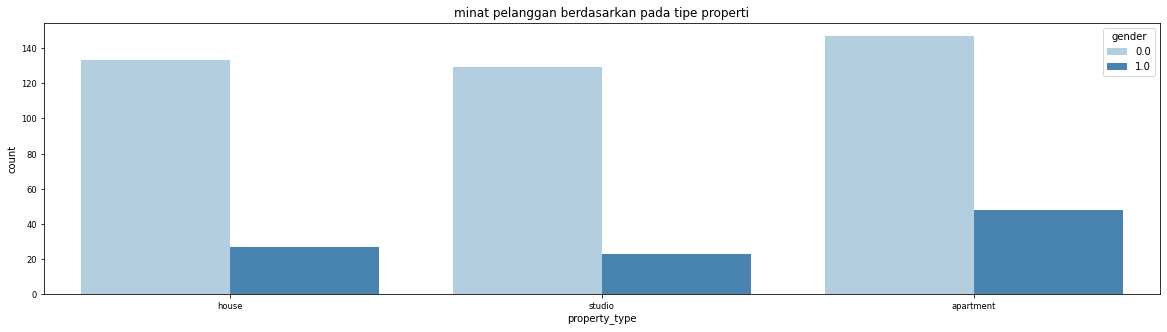

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
ageheart = sns.countplot(x=df_dataset['property_type'],hue=df_dataset['gender'],palette='Blues')
ageheart.set_title('Minat Pelanggan Berdasarkan Pada Tipe Properti')
plt.show()

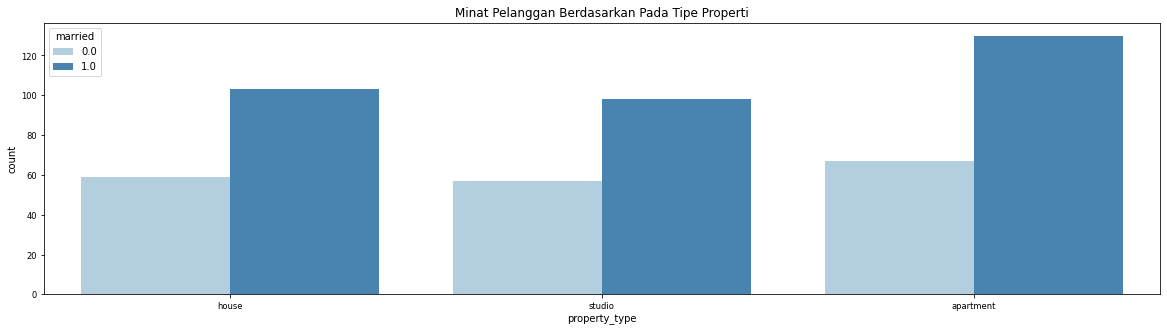

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
ageheart = sns.countplot(x=df_dataset['property_type'],hue=df_dataset['married'],palette='Blues')
ageheart.set_title('Minat Pelanggan Berdasarkan Pada Tipe Properti')
plt.show()

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam

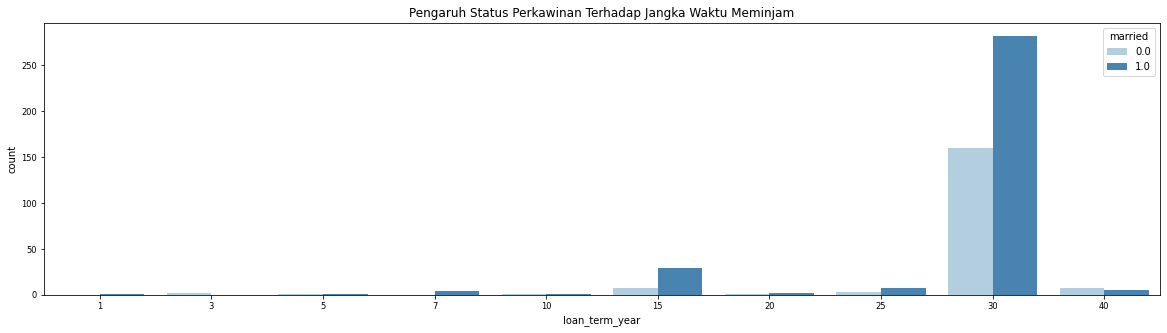

In [ ]:
f, ax = plt.subplots(figsize=(20, 5))
ageheart = sns.countplot(x=df_dataset['loan_term_year'],hue=df_dataset['married'],palette='Blues')
ageheart.set_title('Pengaruh Status Perkawinan Terhadap Jangka Waktu Meminjam')
plt.show()